En este análisis, trabajaré con una base de datos de la Liga MX que abarca los resultados de partidos desde 2016 hasta 2023. El objetivo es identificar qué factores influyen en que un equipo gane o pierda un partido.

La base de datos contiene diversas variables relacionadas con los encuentros, incluyendo información sobre los equipos, el arbitraje, los goles y otros aspectos relevantes. A continuación, se describen las variables incluidas en el análisis:



*   id: Número de identificación del partido.
*   referee: Nombre del árbitro.
*   referee: Nombre del árbitro.
*   timezone: Zona horaria en la que se disputó el partido.
*   date: Fecha del encuentro.
*   venue_id: Identificación del estadio.
*   venue_name: Nombre del estadio.
*   venue_city: Ciudad donde se ubica el estadio.
*   season: Temporada en la que se jugó el partido.
*   round: Jornada del torneo en la que se disputó el encuentro.
*   home_team: Equipo que juega como local.
*   away_team: Equipo que juega como visitante.
*   away_win: Equipo ganador del partido.
*   home_goals: Cantidad de goles anotados por el equipo local.
*   away_goals: Cantidad de goles anotados por el equipo visitante.
*   home_goals_half_time: Goles del equipo local al medio tiempo.
*   away_goals_half_time: Goles del equipo visitante al medio tiempo.
*   home_goals_fulltime: Goles del equipo local al final del tiempo reglamentario.
*   away_goals_fulltime: Goles del equipo visitante al final del tiempo reglamentario.
*   home_goals_extra_time: Goles del equipo local en tiempo extra.
*   away_goals_extra_time: Goles del equipo visitante en tiempo extra.
*   home_goals_penalty: Goles del equipo local en tanda de penales.
*   away_goals_penalty: Goles del equipo visitante en tanda de penales.



La base de datos utilizada en este estudio fue obtenida de Kaggle en el siguiente enlace:

LigaMX. (2024, 25 de junio). Kaggle. https://www.kaggle.com/datasets/gerardojaimeescareo/ligamx-matches-2016-2022









In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datos = pd.read_csv("2016-2023_liga_mx.csv")
print(datos.head(15))

# Eliminare diversas variables de el Archivo ya que no aportan al modelo
datos = datos.drop(columns=["id"]) # Es un valor de identificación no aporta nada al modelo
datos = datos.drop(columns=["referee"]) # Realmente no importa para este modelo
datos = datos.drop(columns=["timezone"]) # Es siempre la misma ademas de que no aporta nada
datos = datos.drop(columns=["date"]) # no nos importa la fecha del juego
datos = datos.drop(columns=["venue_id"]) # Es un valor de identificación del estadio y no nos importa
datos = datos.drop(columns=["venue_name"]) # Es el nombre del estadio y realmente no importa
datos = datos.drop(columns=["venue_city"]) # No me importa saber la ciudad en donde fue
datos = datos.drop(columns=["season"]) # No me importa la temporada donde fue el juego
datos = datos.drop(columns=["round"]) # no me importa saber en que jornada estan
datos = datos.drop(columns=["home_team"]) # Otra variable nos da esa información seria redundante
datos = datos.drop(columns=["away_team"]) # Otra variable nos da esa información seria redundante
datos = datos.drop(columns=["home_goals_fulltime"]) # Es exactamente lo mismo que otra variable
datos = datos.drop(columns=["away_goals_fulltime"])  # Es exactamente lo mismo que otra variable
datos = datos.drop(columns=["home_goals_extra_time"]) # Son valores nulos no dan información
datos = datos.drop(columns=["away_goals_extratime"]) # Son valores nulos no dan información
datos = datos.drop(columns=["home_goals_penalty"]) # Es exactamente lo mismo que otra variable
datos = datos.drop(columns=["away_goals_penalty"]) # Es exactamente lo mismo que otra variable


print("/n Nuevos Datos")
# Ahora imprimire los datos despues de eliminar todas esas columnas
print(datos.head(15))

# Información sobre el DATASET
print("Información: ", datos.shape)

        id       referee timezone                       date  venue_id  \
0   864094  L. Santander      UTC  2022-07-02T22:00:00+00:00    1080.0   
1   864095   D. Quintero      UTC  2022-07-02T02:05:00+00:00   10546.0   
2   864096      I. Lopez      UTC  2022-07-02T22:00:00+00:00    1076.0   
3   864097      Ó. Mejía      UTC  2022-07-03T00:05:00+00:00    1087.0   
4   864098   F. Guerrero      UTC  2022-07-03T02:05:00+00:00    7182.0   
5   864099   A. Escobedo      UTC  2022-07-03T17:00:00+00:00    1083.0   
6   864100  F. Hernández      UTC  2022-07-03T22:00:00+00:00    1795.0   
7   864101      J. Pérez      UTC  2022-07-04T00:05:00+00:00    1085.0   
8   864102      C. Ramos      UTC  2022-07-05T02:00:00+00:00    1081.0   
9   864103   A. Escobedo      UTC  2022-07-09T00:00:00+00:00   10546.0   
10  864104      C. Ramos      UTC  2022-07-09T02:05:00+00:00    1082.0   
11  864105     Ó. Macías      UTC  2022-07-09T02:05:00+00:00    1088.0   
12  864106      Ó. Mejía      UTC  202

Mediante esto decidi hacer una regresión lineal ya que la variable que me interesa predecir es numérica y continua. Ademas de que un modelo de regresión lineal facilita la interpretación de la relación entre múltiples variables permitiendo identificar que factores tienen mayor impacto

In [5]:
# Realizare tecnicas para limpiar y arreglar la base de datos
datos = datos.fillna(0)
# Valores faltantes
print("\nValores faltantes antes de la corrección:")
print(datos.isnull().sum())


# Se puede observar un problema ya que en home_win y away_win no considera cuando los equipos empatan
# Hare un pequeño codigo para arreglar esto

def obtener_resultado(row):
    if row["home_goals"] > row["away_goals"]:
        return "home_win" # Gana el equipo en casa
    elif row["home_goals"] < row["away_goals"]:
        return "away_win" # Gana el equipo visitante
    else:
        return "empate"

# Se aplica la función en cada fila
datos["match_result"] = datos.apply(obtener_resultado, axis=1)

# Se creará una nueva variable binaria "win" que indique si un equipo ganó o no
datos["win"] = datos["match_result"].apply(lambda x: 1 if x in ["home_win", "away_win"] else 0)

# Hare One-Hot Enconding en la variable match_results
datos = pd.get_dummies(datos, columns=["match_result"], drop_first=True)

# Verificar cambios
print(datos.head())


Valores faltantes antes de la corrección:
home_win                0
away_win                0
home_goals              0
away_goals              0
home_goals_half_time    0
away_goals_half_time    0
dtype: int64
  home_win away_win  home_goals  away_goals  home_goals_half_time  \
0    False     True         1.0         3.0                   1.0   
1    False     True         2.0         4.0                   0.0   
2        0        0         0.0         0.0                   0.0   
3    False     True         2.0         3.0                   0.0   
4        0        0         0.0         0.0                   0.0   

   away_goals_half_time  win  match_result_empate  match_result_home_win  
0                   2.0    1                False                  False  
1                   2.0    1                False                  False  
2                   0.0    0                 True                  False  
3                   1.0    1                False                  False 

En este proceso apliqué diversas técnicas de preprocesamiento de datos con el objetivo de limpiar y estructurar la base de datos.

Antes de realizar estos ajustes, eliminé diversas columnas que no aportaban información relevante al modelo. Posteriormente, en las columnas home_goals_penalty y away_goals_penalty, corregí los valores faltantes asignándoles un valor de 0, ya que en esos casos no se ejecutaron penales en el partido.

Además, ajusté las columnas home_win y away_win, ya que únicamente indicaban si un equipo ganaba o perdía, sin considerar la posibilidad de empate. Para solucionar esto, eliminé ambas columnas y creé una nueva variable denominada match_result, la cual clasifica los partidos en tres categorías: "home_win", "away_win" y "empate".

También generé la variable win, basada en match_result, para representar si un equipo ganó (1) o no (0), ya que esta es la variable clave para la predicción.

Finalmente, realicé un proceso de One-Hot Encoding a match_result para convertir sus valores en variables binarias, facilitando su uso en el modelo de predicción.

 Dimensiones de conjunto de entrenamiento: (2164, 8)
 Dimensiones de conjunto de prueba: (542, 8)
 Suma de dimensiones: 2706
Características seleccionadas: ('home_win', 'away_win', 'home_goals', 'away_goals', 'match_result_empate')
Mayor correlación entre: home_win y match_result_home_win
Valor de la correlación: 0.9943603699021087


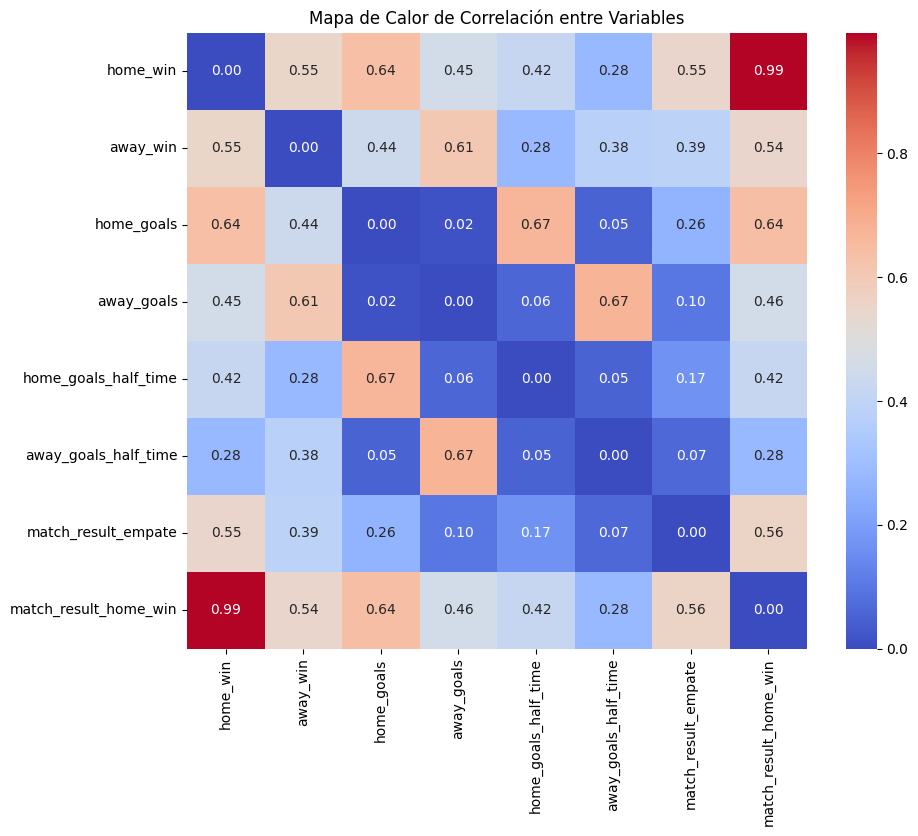

In [6]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Se dividen los datos en conjuntos de entrenamiento y prueba
X = datos.drop('win', axis=1)  # Eliminar la columna 'win' (variable objetivo)
y = datos['win']  # Variable objetivo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Imprimimos las dimensiones de ambos conjuntos y verificamos que sumen la cantidad de datos original
print(" Dimensiones de conjunto de entrenamiento:", X_train.shape)
print(" Dimensiones de conjunto de prueba:", X_test.shape)
print(" Suma de dimensiones:", X_train.shape[0] + X_test.shape[0])

# Ahora iniciare con el proceso de selección de características
model = LinearRegression()
sfs = SFS(model, k_features=(5, 8), forward=True, scoring='r2')
sfs = sfs.fit(X_train, y_train)  # Se ajustará el modelo

# Características seleccionadas
sfs = sfs.k_feature_names_
print("Características seleccionadas:", sfs)

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

# Hacer un Heatmap para mostrar la correlación de las variables

# Crear la matriz de correlación con los nombres de las columnas
cor = X_train.corr().abs()  # Usar X_train.corr() para mantener los nombres de las columnas

# Llenar la diagonal con ceros para evitar autovariables de 1
np.fill_diagonal(cor.values, 0)

# Obtener los índices (i, j) de la correlación máxima
i, j = np.unravel_index(cor.values.argmax(), cor.shape)

# Imprimir los nombres de las variables con mayor correlación
print(f"Mayor correlación entre: {X_train.columns[i]} y {X_train.columns[j]}")
print(f"Valor de la correlación: {cor.iloc[i, j]}")

# Graficar el heatmap con nombres de variables
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()

En este análisis, realicé una selección de características hacia adelante utilizando el algoritmo Sequential Feature Selector (SFS). Este método selecciona las características más importantes para el modelo de regresión lineal.

Luego, generé un heatmap de correlación para ver cómo se relacionan las variables entre sí. Las áreas rojas indican una alta correlación positiva y las azules una baja correlación. El heatmap mostró que home_win y match_result_home_win tienen una correlación de 0.99, lo que significa que son casi lo mismo, por lo eliminare una de ellas. También, home_goals y away_goals tienen una correlación de 0.65, lo que sugiere que más goles en casa suelen ir acompañados de más goles del equipo visitante. Además, home_goals y home_goals_half_time tienen una correlación de 0.67, mostrando que los goles en el primer tiempo se relacionan con los goles totales en casa lo cual es logico . Finalmente, home_goals_penalty y away_goals_penalty tienen una correlación de 0.85, lo que indica que los goles de penalti en casa y en el equipo visitante están fuertemente relacionados.

Este análisis ayudó a reducir las características del modelo y a enfocarse en las más importantes para mejorar la precisión del modelo.




Resumen del modelo lineal:
                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     64.05
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.36e-52
Time:                        16:50:59   Log-Likelihood:                -1571.9
No. Observations:                2706   AIC:                             3154.
Df Residuals:                    2701   BIC:                             3183.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

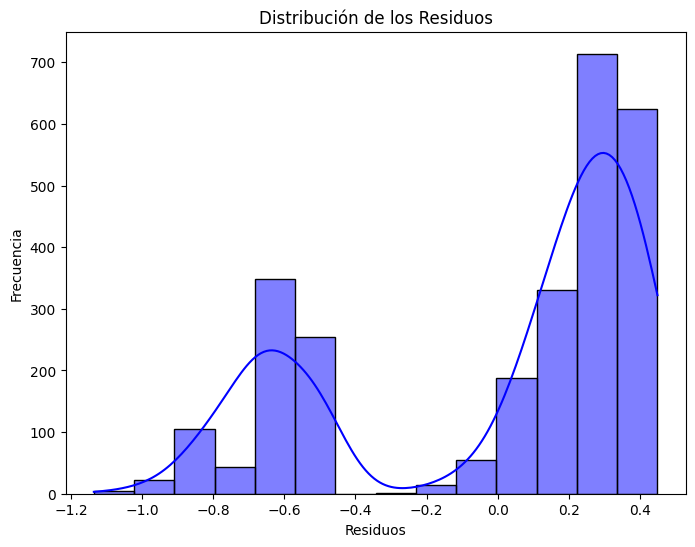


Resumen del modelo polinómico:
                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     55.84
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.03e-137
Time:                        16:50:59   Log-Likelihood:                -1349.4
No. Observations:                2706   AIC:                             2729.
Df Residuals:                    2691   BIC:                             2817.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.118

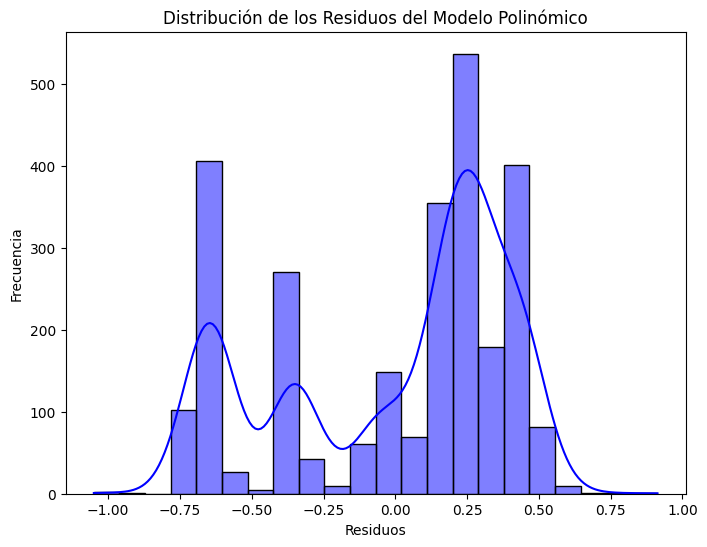

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = datos.drop('win', axis=1)
y = datos['win']

# Seleccionar solo características numéricas
X = X.select_dtypes(include=np.number)

# Constantes
X = sm.add_constant(X)

# Modelo Lineal
modelo_lineal = sm.OLS(y, X).fit()
print("\nResumen del modelo lineal:")
print(modelo_lineal.summary())


# predicciones
y_pred_lineal = modelo_lineal.predict(X)
residuos = y - y_pred_lineal

# MSE lineal
mse_lineal = mean_squared_error(y, y_pred_lineal)  # Error cuadrático medio
r2_lineal = modelo_lineal.rsquared  # Coeficiente de determinación R²
print(f"\nError cuadrático medio (MSE) del modelo lineal: {mse_lineal}")
print(f"R² del modelo lineal: {r2_lineal}")

# Histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------

# Modelo cuadratico

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transformación de las características

# Añadir la constante (intercepto) al modelo polinómico
X_poly = sm.add_constant(X_poly)

# Ajustar el modelo polinómico
modelo_polinomico = sm.OLS(y, X_poly).fit()
print("\nResumen del modelo polinómico:")
print(modelo_polinomico.summary())

# predicciones
y_pred_polinomico = modelo_polinomico.predict(X_poly)

# mSE polinomico
mse_polinomico = mean_squared_error(y, y_pred_polinomico)  # Error cuadrático medio
r2_polinomico = modelo_polinomico.rsquared  # Coeficiente de determinación R²
print(f"\nError cuadrático medio (MSE) del modelo polinómico: {mse_polinomico}")
print(f"R² del modelo polinómico: {r2_polinomico}")


residuos_polinomico = y - y_pred_polinomico
# 3. Histograma de los residuos para comprobar la normalidad
plt.figure(figsize=(8,6))
sns.histplot(residuos_polinomico, kde=True, color='blue')
plt.title('Distribución de los Residuos del Modelo Polinómico')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Utilizando los métodos para detectar errores, el Error Cuadrático Medio (MSE) del modelo lineal es de 0.1871, lo que indica que el modelo presenta un nivel moderado de error en sus predicciones. Aunque este valor es relativamente bajo, aún puede mejorar. Por otro lado, el R² del modelo es 0.087, lo que significa que el modelo solo explica el 8.7% de la variabilidad de la variable dependiente "win". Este valor es bastante bajo, lo que sugiere que el modelo no está capturando adecuadamente la relación entre las variables.

En cuanto al histograma de los residuos, este muestra que el modelo no sigue una distribución completamente normal, lo que refuerza la idea de que el modelo lineal no es el más adecuado para el ajuste de estos datos.

Por otro lado, el modelo cuadrático mostró un MSE de 0.1587, que es más bajo que el del modelo lineal. Esto sugiere que el modelo cuadrático realiza un mejor ajuste a los datos, mejorando así la precisión de las predicciones. El R² en este caso es 0.2251, lo que es significativamente más alto que en el modelo lineal, indicando que explica mejor la variabilidad en los datos. Esto sugiere que la relación entre las variables no es completamente lineal y que el modelo polinómico podría ser más adecuado para capturar estas complejidades.

Finalmente, el histograma de los residuos muestra una mejora respecto al modelo lineal. Aunque los residuos no siguen una distribución completamente normal, sí presentan menos asimetría y dispersión. Sin embargo, esto sugiere que aún no se ha encontrado un modelo óptimo. Aunque el modelo cuadrático captura más variabilidad, todavía hay espacio para mejorar, por lo que podría ser útil explorar transformaciones adicionales o probar modelos más complejos.

In [11]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Constantes
X_poly = sm.add_constant(X_poly)

# Se ajusta el modelo
modelo_polinomico = sm.OLS(y, X_poly).fit()

print("\nResumen del modelo polinómico:")
print(modelo_polinomico.summary())


# Intervalos de confianza
intervalos_confianza = modelo_polinomico.conf_int(alpha=0.05)  # Intervalo de confianza del 95%
print("\nIntervalos de confianza (95%) para los coeficientes:")
print(intervalos_confianza)


Resumen del modelo polinómico:
                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     55.84
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.03e-137
Time:                        17:20:06   Log-Likelihood:                -1349.4
No. Observations:                2706   AIC:                             2729.
Df Residuals:                    2691   BIC:                             2817.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.118

En base al análisis de los intervalos de confianza de los coeficientes, se pueden seleccionar las variables que tienen un impacto significativo sobre la variable dependiente win. Las variables x1, x2, x3, x5, x7 presentan intervalos de confianza que no incluyen el valor cero, lo que indica que tienen una relación significativa con la variable dependiente. Esto sugiere que estos coeficientes tienen un efecto importante en la predicción de win y, por lo tanto, deberían ser considerados en el modelo final. Las variables cuyo intervalo de confianza incluye cero, como x4 y x6, no parecen tener un impacto claro y podrían ser eliminadas del modelo para simplificar la predicción y mejorar la interpretabilidad del modelo.